# Adversarial Search: Playing Connect 4

Student Name: [Hiren Bagga]

I have used the following AI tools: [ChatGPT]

I understand that my submission needs to be my own work: [HB]

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

Initial State: The initial state is an empty board with no discs placed.

Actions: The possible actions are the columns where a disc can be dropped. The action space is limited by the number of columns in the board and whether a column is already full.

Result/Transition Function: Dropping a disc into a column adds the disc to the lowest available row in that column.

Goal State: A player achieves four discs in a row (horizontally, vertically, or diagonally), or the board is full (resulting in a draw).

Utility: +1 for a win, -1 for a loss, and 0 for a draw.

In [ ]:
#these are literally my helper functions so they're implemented below in task 2

How big is the state space? Give an estimate and explain it.

There are 42 positions in the grid and 3 possible configurations for each.
3^42 gives us our state space of 1.39 x 10^20. This isn't actually how big the state space is. It would be smaller due to the constraints of the game, but the state space is still prohibitively large for brute forcing. Upon further research, the state space has been found to be 4,531,985,219,092.

How big is the game tree that minimax search will go through? Give an estimate and explain it.


\frac{7^{43}-1}{6} = 3.15 x 10^35.


I cannot get LateX to work. This equation explains a depth of 42 being used to make a geometric series.

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [ ]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

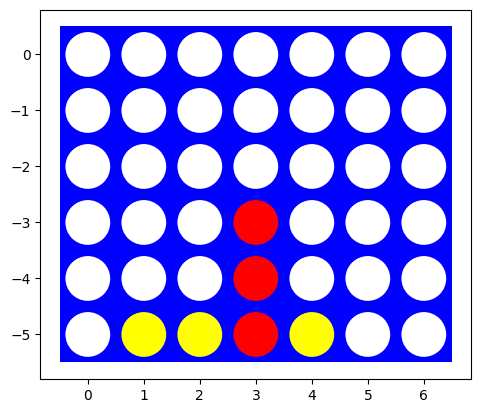

In [ ]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [ ]:
def actions(board):
    return [col for col in range(board.shape[1]) if board[0, col] == 0]


def result(board, player, action):
    new_board = board.copy()
    for row in range(board.shape[0] - 1, -1, -1):
        if new_board[row, action] == 0:
            new_board[row, action] = player
            return new_board
    raise ValueError(f"Invalid action: Column {action} is full.")


def check_winner(board):
    rows, cols = board.shape

    # Horizontal check
    for row in range(rows):
        for col in range(cols - 3):
            line = board[row, col:col + 4]
            if abs(np.sum(line)) == 4:
                return np.sign(np.sum(line))

    # Vertical check
    for row in range(rows - 3):
        for col in range(cols):
            line = board[row:row + 4, col]
            if abs(np.sum(line)) == 4:
                return np.sign(np.sum(line))

    # Diagonal /
    for row in range(3, rows):
        for col in range(cols - 3):
            line = [board[row - i, col + i] for i in range(4)]
            if abs(np.sum(line)) == 4:
                return np.sign(np.sum(line))

    # Diagonal \
    for row in range(rows - 3):
        for col in range(cols - 3):
            line = [board[row + i, col + i] for i in range(4)]
            if abs(np.sum(line)) == 4:
                return np.sign(np.sum(line))

    return 0  # No winner


def terminal(board):
    return check_winner(board) != 0 or all(board[0, col] != 0 for col in range(board.shape[1]))


def utility(board, player):
    winner = check_winner(board)
    if winner == player:
        return 1
    elif winner == -player:
        return -1
    return 0

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [ ]:
import random
def random_agent(board, player=1):
    valid_actions = actions(board)
    return random.choice(valid_actions)

Random agent chose column: 0


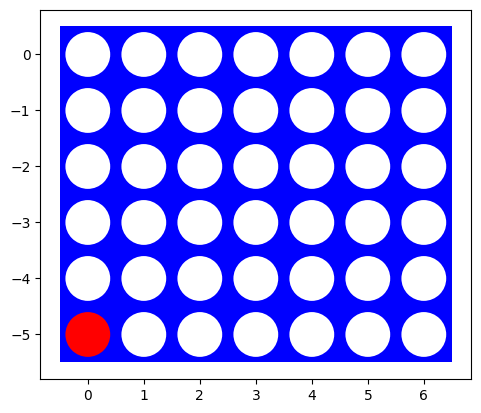

In [ ]:
if __name__ == "__main__":
    # Example empty board
    board = empty_board()
    player = 1  # Red player
    random_action = random_agent(board, player)
    print(f"Random agent chose column: {random_action}")
    # Visualize the board after placing the disc
    board = result(board, player, random_action)
    visualize(board)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
class PureMonteCarloAgent:
    def __init__(self, simulations_per_action=100):
        self.simulations_per_action = simulations_per_action

    def random_playout(self, board, player):
        current_player = player
        while not terminal(board):  # Use the global `terminal` function
            valid_actions = actions(board)  # Use the global `actions` function
            action = random.choice(valid_actions)
            board = result(board, current_player, action)  # Use the global `result` function
            current_player = -current_player
        return check_winner(board)  # Use the global `check_winner` function

    def monte_carlo_agent(self, board, player=1):
        valid_actions = actions(board)  # Use the global `actions` function
        action_scores = {action: 0 for action in valid_actions}

        # Perform simulations for each action
        for action in valid_actions:
            wins = 0
            for _ in range(self.simulations_per_action):
                simulated_board = result(board, player, action)  # Use the global `result` function
                result_outcome = self.random_playout(simulated_board, -player)
                if result_outcome == player:
                    wins += 1
            action_scores[action] = wins

        # Select the action with the highest win rate
        best_action = max(action_scores, key=action_scores.get)
        return best_action

    def __call__(self, board, player):
        return self.monte_carlo_agent(board, player)

In [ ]:
# Initialize the Monte Carlo Agent
monte_carlo_agent = PureMonteCarloAgent(simulations_per_action=3000)

# Simulate a game between two Monte Carlo agents
def simulate_game_with_monte_carlo(agent1, agent2, board):
    print("Initial Board:")
    visualize(board)

    for move in range(42):  # Maximum moves on a 6x7 board
        player = 1 if move % 2 == 0 else -1
        agent = agent1 if player == 1 else agent2

        # Check for a winner or terminal state
        if terminal(board):
            winner = check_winner(board)
            if winner == 1:
                print("Player 1 (Red) wins!")
            elif winner == -1:
                print("Player -1 (Yellow) wins!")
            else:
                print("It's a draw!")
            return  # Game over, exit function

        # Get the action from the current agent
        action = agent(board, player)  # Call the agent directly
        print(f"Player {player} chooses column {action}")

        # Apply the action to the board
        board = result(board, player, action)
        print("Board after the move:")
        visualize(board)

    # If the loop ends, check for a draw
    winner = check_winner(board)
    if winner == 0:
        print("It's a draw!")
    elif winner == 1:
        print("Player 1 (Red) wins!")
    elif winner == -1:
        print("Player -1 (Yellow) wins!")

# Initialize a 6x7 board
test_board = empty_board((6, 7))

# Run the simulation with the Monte Carlo Agent vs itself
#simulate_game_with_monte_carlo(monte_carlo_agent, monte_carlo_agent, test_board)

Initial Board:


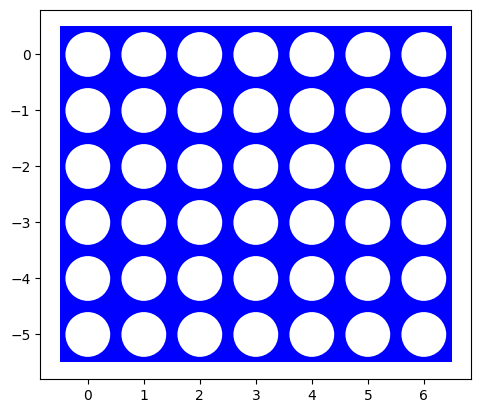

Your turn (Player 1).
Valid columns: [0, 1, 2, 3, 4, 5, 6]
Player 1 places in column 3.


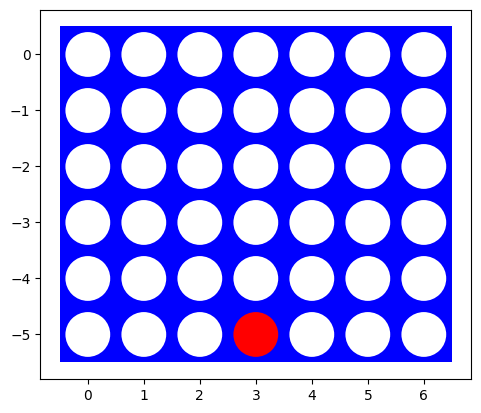

Agent's turn (Player -1).
Player -1 places in column 3.


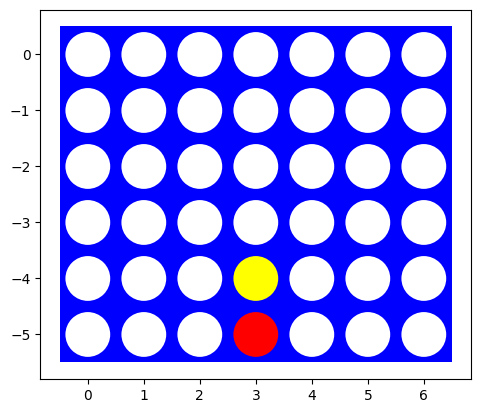

Your turn (Player 1).
Valid columns: [0, 1, 2, 3, 4, 5, 6]
Player 1 places in column 3.


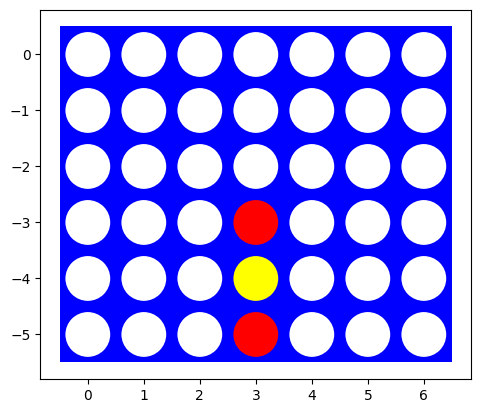

Agent's turn (Player -1).
Player -1 places in column 4.


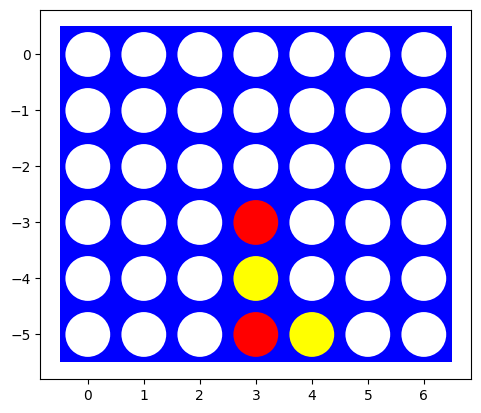

Your turn (Player 1).
Valid columns: [0, 1, 2, 3, 4, 5, 6]
Player 1 places in column 3.


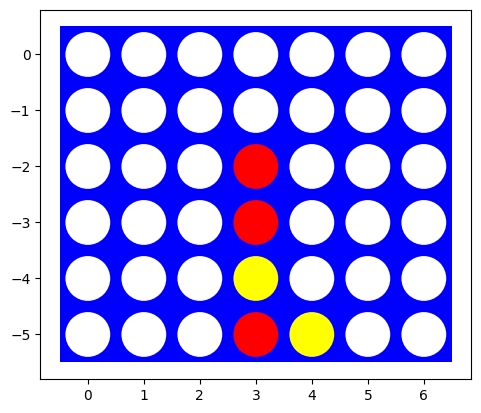

Agent's turn (Player -1).
Player -1 places in column 4.


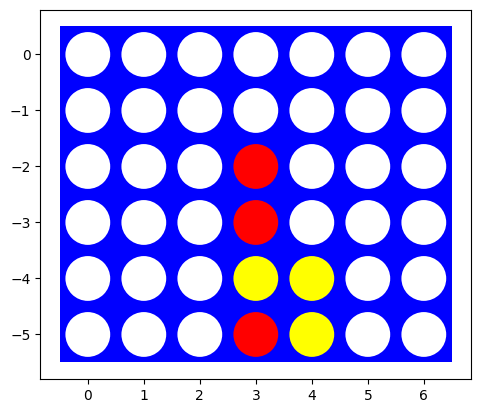

Your turn (Player 1).
Valid columns: [0, 1, 2, 3, 4, 5, 6]
Player 1 places in column 3.


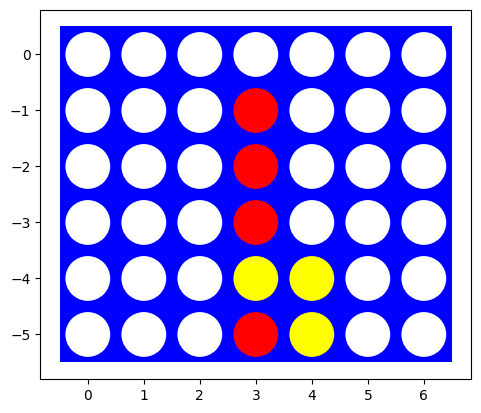

Agent's turn (Player -1).
Player -1 places in column 3.


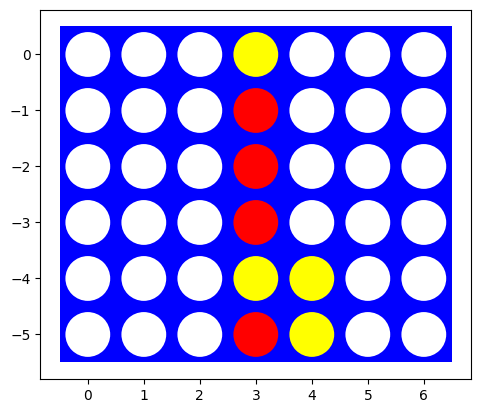

Your turn (Player 1).
Valid columns: [0, 1, 2, 4, 5, 6]


In [ ]:
def simulate_game_with_human_vs_agent(human_player, agent, board):
    """
    Simulates a game between a human and the Monte Carlo agent.
    :param human_player: 1 (Red) if the human is Player 1, or -1 (Yellow) if the human is Player -1.
    :param agent: The agent playing against the human.
    :param board: Initial game board (6x7 for Connect Four).
    """
    print("Initial Board:")
    visualize(board)

    for move in range(42):  # Maximum moves on a 6x7 board
        player = 1 if move % 2 == 0 else -1
        if player == human_player:
            # Human's turn
            print(f"Your turn (Player {human_player}).")
            valid_moves = actions(board)
            print(f"Valid columns: {valid_moves}")

            while True:
                try:
                    human_action = int(input("Enter the column (0-6) where you want to drop your disc: "))
                    if human_action in valid_moves:
                        break
                    print("Invalid move. Try again.")
                except ValueError:
                    print("Please enter a valid integer.")

            action = human_action
        else:
            # Agent's turn
            print(f"Agent's turn (Player {player}).")
            action = agent(board, player)

        # Apply the action to the board
        board = result(board, player, action)
        print(f"Player {player} places in column {action}.")
        visualize(board)

        # Check for a winner or terminal state
        if terminal(board):
            winner = check_winner(board)
            if winner == human_player:
                print("Congratulations! You win!")
            elif winner == -human_player:
                print("The agent wins. Better luck next time!")
            else:
                print("It's a draw!")
            return  # Game over

    print("It's a draw!")  # If the loop ends without a terminal state

# Initialize a 6x7 board
test_board = empty_board((6, 7))

# Play as Player 1 (Red) against the Monte Carlo agent
simulate_game_with_human_vs_agent(human_player=1, agent=monte_carlo_agent, board=test_board)